In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pt
import sklearn
import pylab as plt
import string

In [2]:
df = pd.read_csv ('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

C:\Users\cagat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


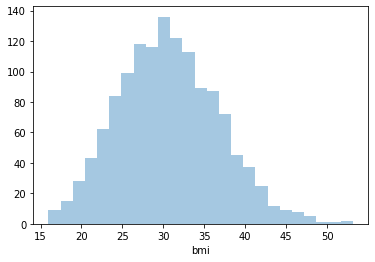

In [4]:
sns.distplot(df.bmi, kde = False);


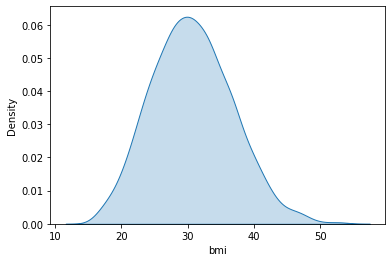

In [5]:
sns.kdeplot(df.bmi, shade = True);

## “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

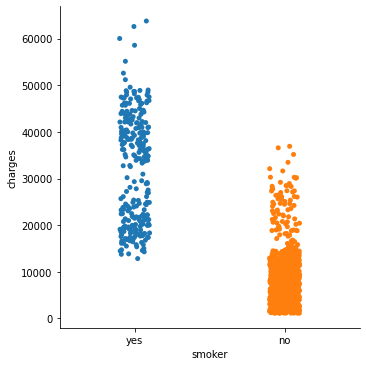

In [6]:
sns.catplot(x = df.smoker, y = df.charges, data = df);

## “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


In [7]:
print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == 'yes'].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df[df.region == "southeast"].smoker.count() * 100)

Smokers rate in northwest :  17.846153846153847
Smokers rate in northeast :  20.679012345679013
Smokers rate in southwest :  17.846153846153847
Smokers rate in southeast :  25.0


<ipython-input-7-44da2e84042a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northwest : ", df[df.region == "northwest"][df.smoker == 'yes'].smoker.count() / df[df.region == "northwest"].smoker.count() * 100)
<ipython-input-7-44da2e84042a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in northeast : ", df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df[df.region == "northeast"].smoker.count() * 100)
<ipython-input-7-44da2e84042a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southwest : ", df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df[df.region == "southwest"].smoker.count() * 100)
<ipython-input-7-44da2e84042a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Smokers rate in southeast : ", df[df.region == "southeast"][df.smoker == "yes"].

In [8]:
northwest = df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
northeast = df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
southwest = df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
southeast = df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100

<ipython-input-8-91cd6f18c48b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  northwest = df[df.region == "northwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  northeast = df[df.region == "northeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  southwest = df[df.region == "southwest"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100
<ipython-input-8-91cd6f18c48b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  southeast = df[df.region == "southeast"][df.smoker == "yes"].smoker.count() / df.smoker.count() * 100


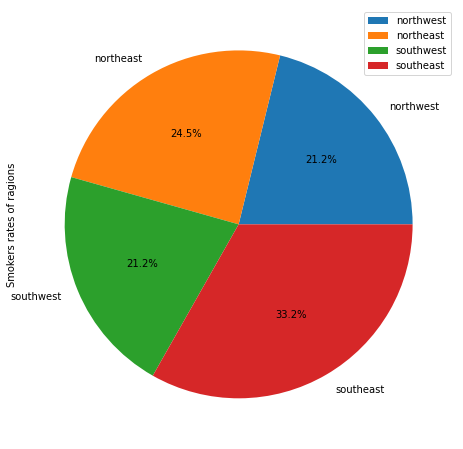

In [9]:
tmp_df = pd.DataFrame({'Smokers rates of ragions': [northwest, northeast , southwest , southeast]},
                  index=['northwest', 'northeast', 'southwest' , 'southeast'])
plot = tmp_df.plot.pie(y='Smokers rates of ragions', figsize=(8, 8),autopct='%.1f%%')

## “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

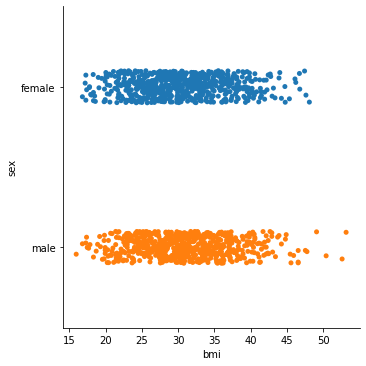

In [10]:
sns.catplot(x = df.bmi, y = df.sex, data = df);

In [11]:
print("Avg of males bmi : ", np.average(df[df.sex == "male"].bmi))
print("Avg of females bmi : ", np.average(df[df.sex == "female"].bmi))

Avg of males bmi :  30.943128698224854
Avg of females bmi :  30.37774924471299


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## En çok “children”’a sahip “region”’ı bulunuz.

In [13]:
chd_northwest = np.sum(df[df.region == "northwest"].children)
chd_northeast = np.sum(df[df.region == "northeast"].children)
chd_southwest = np.sum(df[df.region == "southwest"].children)
chd_southeast = np.sum(df[df.region == "southeast"].children)

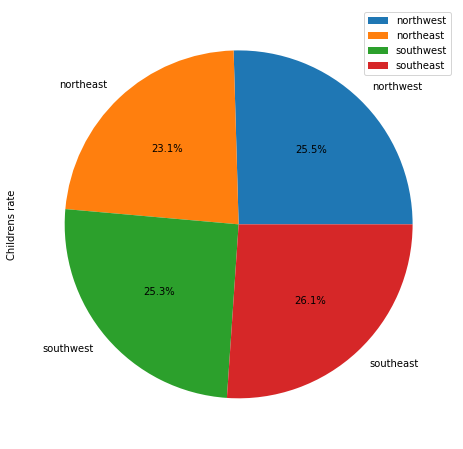

In [14]:
tmp_df = pd.DataFrame({'Childrens rate': [chd_northwest, chd_northeast , chd_southwest , chd_southeast]},
                  index=['northwest', 'northeast', 'southwest' , 'southeast'])
plot = tmp_df.plot.pie(y='Childrens rate', figsize=(8, 8),autopct='%.1f%%')

## Age” ile “bmi” arasındaki ilişkiyi inceleyiniz

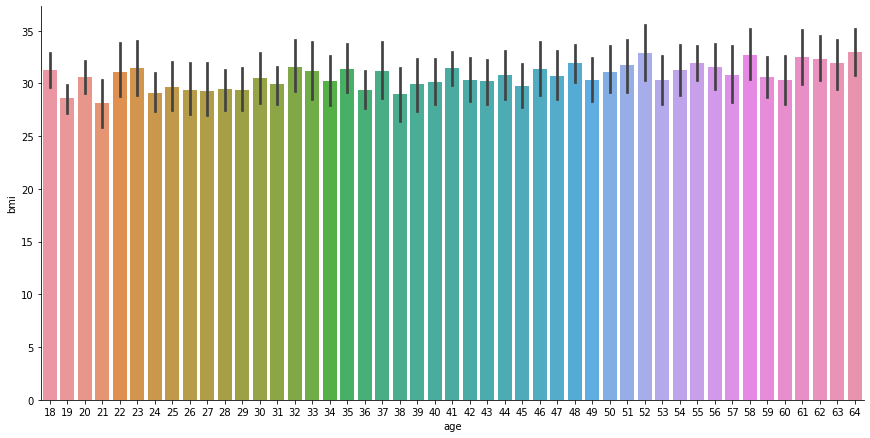

In [15]:
sns.catplot(x = df.age, y = df.bmi,
               height=6,  aspect=2,
               kind='bar', 
               data= df);

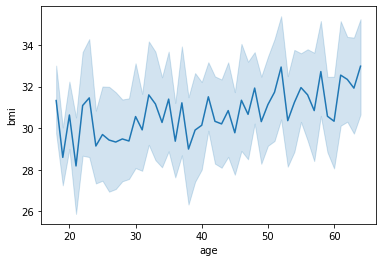

In [16]:
sns.lineplot(x = df.age, y = df.bmi,
            data= df);

## “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

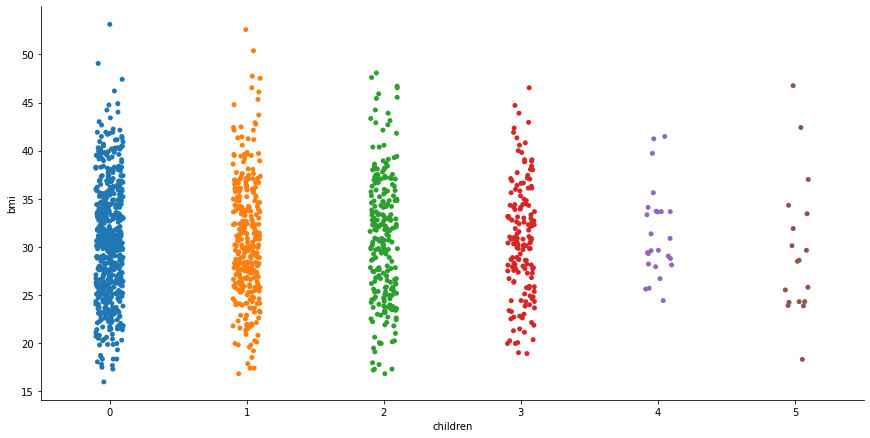

In [17]:
sns.catplot(x = df.children, y = df.bmi,
               height=6,  aspect=2,
               data= df);

In [18]:
print("Avg bmi for '0' child ",np.average(df.bmi[df.children == 0]))
print("Avg bmi for '1' child ",np.average(df.bmi[df.children == 1]))
print("Avg bmi for '2' children ",np.average(df.bmi[df.children == 2]))
print("Avg bmi for '3' children ",np.average(df.bmi[df.children == 3]))
print("Avg bmi for '4' children ",np.average(df.bmi[df.children == 4]))
print("Avg bmi for '5' children ",np.average(df.bmi[df.children == 5]))


Avg bmi for '0' child  30.550296167247385
Avg bmi for '1' child  30.623148148148147
Avg bmi for '2' children  30.978104166666665
Avg bmi for '3' children  30.684331210191086
Avg bmi for '4' children  31.391199999999998
Avg bmi for '5' children  29.605


## “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

<AxesSubplot:xlabel='bmi'>

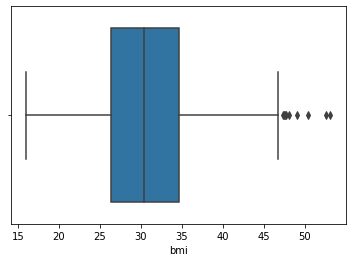

In [19]:
sns.boxplot(x = df.bmi)

## “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


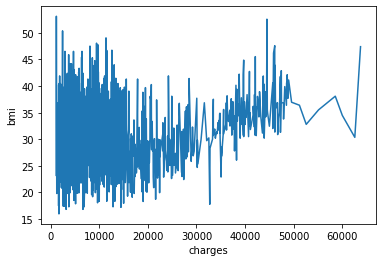

In [21]:
sns.lineplot(x = df.charges, y = df.bmi,
            data= df);

## “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

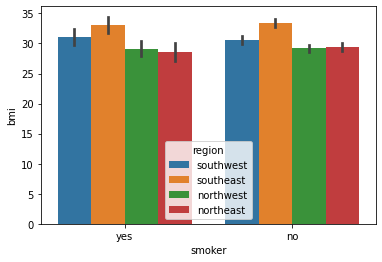

In [22]:
sns.barplot(x = df.smoker, y = df.bmi, hue = df.region, data = df);

In [23]:
df = df.dropna()
#df_tmp = df.select_dtypes(include= ['float64', 'int64'])

In [24]:
def defineBoundry(tmp):
    Q1 = tmp.quantile(0.25)
    Q3 = tmp.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return [lower_limit, upper_limit]

In [25]:
low_lim, up_lim = defineBoundry(df.bmi)

In [32]:
clean_df = df[~((df.bmi < (low_lim)) | (df.bmi > (up_lim)))]

(1338, 7)

(1329, 7)